# Conclusion:

- Import data from file 'postings_v3.csv'
- All values are filled except 'salary_range'

- Models build in here
    - Neural Network
    - Logistic Regression
    - Decision Trees
    - Random Forest
    - Support Vector Machines (SVMs)
    
- for Neural Network Model Evaluation log, excel 'NN Model Report' is created

- So far the best Model is:
    - Neural Network Model
    - Attempt# 
    - 1st Layer Dense: 
    - 2nd Layer Dense:
    - epochs: 
    
    - Accuracy
    - Precision
    - Recall
    - F1 Score


# Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np

# Import Dataset

In [2]:
df = pd.read_csv("./postings_v4.csv")
df.head(3)

,title,Country,State,City,has_salary,salary_range,description,requirements,benefits,telecommuting,has_company_logo,has_questions,has_company_profile,has_required_education,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,US,NY,New York,0,Not Available,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No Listed Benefits,0,1,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,Customer Service - Cloud Video Production,NZ,,Auckland,1,90,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),US,IA,Wever,0,Not Available,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No Listed Benefits,0,1,0,1,0,Unknown,Not Applicable,Unknown,Unknown,Assistant,0


In [3]:
df.shape

(17880, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   17880 non-null  object
 1   Country                 17880 non-null  object
 2   State                   17880 non-null  object
 3   City                    17880 non-null  object
 4   has_salary              17880 non-null  int64 
 5   salary_range            17880 non-null  object
 6   description             17880 non-null  object
 7   requirements            17880 non-null  object
 8   benefits                17880 non-null  object
 9   telecommuting           17880 non-null  int64 
 10  has_company_logo        17880 non-null  int64 
 11  has_questions           17880 non-null  int64 
 12  has_company_profile     17880 non-null  int64 
 13  has_required_education  17880 non-null  int64 
 14  employment_type         17880 non-null  object
 15  re

In [5]:
# Percentages of Null values in dataframe df
round(df.isnull().mean() * 100, 2)

title                     0.0
Country                   0.0
State                     0.0
City                      0.0
has_salary                0.0
salary_range              0.0
description               0.0
requirements              0.0
benefits                  0.0
telecommuting             0.0
has_company_logo          0.0
has_questions             0.0
has_company_profile       0.0
has_required_education    0.0
employment_type           0.0
required_experience       0.0
required_education        0.0
industry                  0.0
function                  0.0
fraudulent                0.0
dtype: float64

In [6]:
# dataset is unbalanced

#  total number of real and fake postings in dataframe
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [7]:
# # create new csv file

# df.to_csv('postings_v3.csv', index=False)

# Process of Vectorization

In [7]:
import regex as re
import regex as re

df['title'] = df['title'].str.lower()
df['title'] = df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['salary_range'] = df['salary_range'].str.lower()
df['salary_range'] = df['salary_range'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['description'] = df['description'].str.lower()
df['description'] = df['description'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['requirements'] = df['requirements'].str.lower()
df['requirements'] = df['requirements'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['benefits'] = df['benefits'].str.lower()
df['benefits'] = df['benefits'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['employment_type'] = df['employment_type'].str.lower()
df['employment_type'] = df['employment_type'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['required_experience'] = df['required_experience'].str.lower()
df['required_experience'] = df['required_experience'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['required_education'] = df['required_education'].str.lower()
df['required_education'] = df['required_education'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['industry'] = df['industry'].str.lower()
df['industry'] = df['industry'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['function'] = df['function'].str.lower()
df['function'] = df['function'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['State'] = df['State'].str.lower()
df['State'] = df['State'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df['City'] = df['City'].str.lower()
df['City'] = df['City'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

In [8]:
#Tokenizing description series
import nltk 
from nltk.tokenize import word_tokenize

df['title'] = df['title'].apply(word_tokenize)
df['salary_range'] = df['salary_range'].apply(word_tokenize)
df['description'] = df['description'].apply(word_tokenize)
df['requirements']  = df['requirements'] .apply(word_tokenize)
df['benefits'] = df['benefits'].apply(word_tokenize)
df['employment_type'] = df['employment_type'].apply(word_tokenize)
df['required_experience'] = df['required_experience'].apply(word_tokenize)
df['required_education'] = df['required_education'].apply(word_tokenize)
df['industry'] = df['industry'].apply(word_tokenize)
df['function'] = df['function'].apply(word_tokenize)
df['Country'] = df['Country'].apply(word_tokenize)
df['State'] = df['State'].apply(word_tokenize)
df['City'] = df['City'].apply(word_tokenize)

In [9]:
#remove stopwords from description
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['title'] = df['title'].apply(lambda x: [word for word in x if word not in stop_words])
df['salary_range'] = df['salary_range'].apply(lambda x: [word for word in x if word not in stop_words])
df['description'] = df['description'].apply(lambda x: [word for word in x if word not in stop_words])
df['requirements']  = df['requirements'] .apply(lambda x: [word for word in x if word not in stop_words])
df['benefits'] = df['benefits'].apply(lambda x: [word for word in x if word not in stop_words])
df['employment_type'] = df['employment_type'].apply(lambda x: [word for word in x if word not in stop_words])
df['required_experience'] = df['required_experience'].apply(lambda x: [word for word in x if word not in stop_words])
df['required_education'] = df['required_education'].apply(lambda x: [word for word in x if word not in stop_words])
df['industry'] = df['industry'].apply(lambda x: [word for word in x if word not in stop_words])
df['function'] = df['function'].apply(lambda x: [word for word in x if word not in stop_words])
df['Country'] = df['Country'].apply(lambda x: [word for word in x if word not in stop_words])
df['State'] = df['State'].apply(lambda x: [word for word in x if word not in stop_words])
df['City'] = df['City'].apply(lambda x: [word for word in x if word not in stop_words])

In [10]:
#join string back for analysis

def combine_words(words_list):
    # Combine the words into a single string with spaces
    combined_string = " ".join(words_list)
    
    return combined_string

df['title'] = df['title'].apply(combine_words)
df['salary_range'] = df['salary_range'].apply(combine_words)
df['description'] = df['description'].apply(combine_words)
df['requirements']  = df['requirements'] .apply(combine_words)
df['benefits'] = df['benefits'].apply(combine_words)
df['employment_type'] = df['employment_type'].apply(combine_words)
df['required_experience'] = df['required_experience'].apply(combine_words)
df['required_education'] = df['required_education'].apply(combine_words)
df['industry'] = df['industry'].apply(combine_words)
df['function'] = df['function'].apply(combine_words)
df['Country'] = df['Country'].apply(combine_words)
df['State'] = df['State'].apply(combine_words)
df['City'] = df['City'].apply(combine_words)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(max_features=440)

df['title'] = cv.fit_transform( df['title'] ).toarray()
df['salary_range'] = cv.fit_transform( df['salary_range'] ).toarray()
df['description'] = cv.fit_transform( df['description'] ).toarray()
df['requirements']  = cv.fit_transform( df['requirements'] ).toarray()
df['benefits'] = cv.fit_transform( df['benefits'] ).toarray()
df['employment_type'] = cv.fit_transform( df['employment_type'] ).toarray()
df['required_experience'] = cv.fit_transform( df['required_experience'] ).toarray()
df['required_education'] = cv.fit_transform( df['required_education'] ).toarray()
df['industry'] = cv.fit_transform( df['industry'] ).toarray()
df['function'] = cv.fit_transform( df['function'] ).toarray()
df['Country'] = cv.fit_transform( df['Country'] ).toarray()
df['State'] = cv.fit_transform( df['State'] ).toarray()
df['City'] = cv.fit_transform( df['City'] ).toarray()


# SMOTE 

# Using 19 Features

In [14]:
df.columns

Index(['title', 'Country', 'State', 'City', 'has_salary', 'salary_range',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'has_company_profile',
       'has_required_education', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [16]:
# X = df[['title', 'salary_range', 'description', 'requirements', 'benefits',
#         'telecommuting', 'has_company_logo', 'has_questions',
#         'employment_type', 'required_experience', 'required_education',
#         'industry', 'function', 'Country', 'State', 'City', 
#         'has_company_profile', 'has_required_education', 'has_salary'
#         ]]



# y = df['fraudulent']

In [91]:
X = df[['title', 'Country', 'has_salary', 'salary_range',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_company_profile',
       'has_required_education', 'employment_type', 'required_experience',
       'required_education'
        ]]



y = df['fraudulent']

In [92]:
from collections import Counter
Counter(y)

Counter({0: 17014, 1: 866})

In [93]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_smo,y_smo = smo.fit_resample(X,y) 

In [94]:
postPert = Counter(y_smo)
postPert

Counter({0: 17014, 1: 17014})

In [32]:
postPert[1]

17014

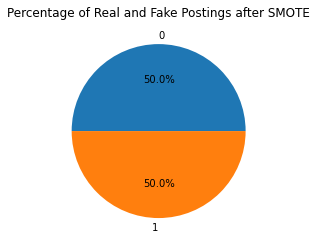

In [33]:

# your Counter object
y_smo = [0]*postPert[0] + [1]*postPert[1]
counter_y_smo = Counter(y_smo)

# pie chart
plt.pie(counter_y_smo.values(), labels=counter_y_smo.keys(), autopct='%1.1f%%')
plt.title('Percentage of Real and Fake Postings after SMOTE')
plt.show()


# Data Split

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo, test_size = 0.2, random_state = 42)

# Building Model

### Functions

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def get_model_initialization(first_dense, second_dense):
    # Initialize model
    model = Sequential()

    # Add first layer with input dimension of 14 (number of features)
    model.add(Dense(first_dense, input_dim=14, activation='relu'))

    # Add second layer
    model.add(Dense(second_dense, activation='relu'))

    # Add output layer with sigmoid activation function
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def get_Model_score (x_test_set, y_test_set, attmpt):
    # Predict the target values for the test data
    y_pred = model.predict(x_test_set)

    # Convert the predicted probabilities to binary labels
    y_pred = [1 if y>0.5 else 0 for y in y_pred]

    # Calculate accuracy
    accuracy = accuracy_score(y_test_set, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_set, y_pred)

    # Calculate precision
    precision = precision_score(y_test_set, y_pred)

    # Calculate recall
    recall = recall_score(y_test_set, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_test_set, y_pred)
    

    
    
    
    print("Confusion Matrix: \n", cm)
    print()
    print("Accuracy: {:.2f} %".format(accuracy * 100))
    print("Precision: {:.2f} %".format(precision * 100))
    print("Recall: {:.2f} %".format(recall * 100))
    print("F1 Score: {:.2f} %".format(f1 * 100))
  


# Neural Network

In [37]:
from keras.layers import Dense

In [38]:
from keras.models import Sequential


## Attempt# 01

In [41]:
first_dense = 20
second_dense = 8

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

get_Model_score(X_test, y_test, 1)

Epoch 1/50
2723/2723 [==============================] - 15s 5ms/step - loss: 0.4776 - accuracy: 0.7711
Epoch 2/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4335 - accuracy: 0.7866
Epoch 3/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4224 - accuracy: 0.7907
Epoch 4/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4158 - accuracy: 0.7937
Epoch 5/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4113 - accuracy: 0.7959
Epoch 6/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4083 - accuracy: 0.7965
Epoch 7/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4059 - accuracy: 0.7992
Epoch 8/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4035 - accuracy: 0.8004
Epoch 9/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4018 - accuracy: 0.7992
Epoch 10/50
2723/2723 [==============================] - 13s 5ms/step - l

## Attempt# 02

In [42]:
first_dense = 20
second_dense = 10

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

get_Model_score(X_test, y_test, 2)

Epoch 1/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4780 - accuracy: 0.7753
Epoch 2/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4281 - accuracy: 0.7920
Epoch 3/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4167 - accuracy: 0.7952
Epoch 4/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4113 - accuracy: 0.7949
Epoch 5/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4081 - accuracy: 0.7966
Epoch 6/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4060 - accuracy: 0.7977
Epoch 7/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4039 - accuracy: 0.7977
Epoch 8/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4029 - accuracy: 0.7991
Epoch 9/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4015 - accuracy: 0.7984
Epoch 10/50
2723/2723 [==============================] - 13s 5ms/step - l

## Attempt# 03

In [43]:
first_dense = 25
second_dense = 9

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

get_Model_score(X_test, y_test, 3)

Epoch 1/100
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4758 - accuracy: 0.7700
Epoch 2/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4268 - accuracy: 0.7889
Epoch 3/100
2723/2723 [==============================] - 12s 5ms/step - loss: 0.4161 - accuracy: 0.7917
Epoch 4/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4096 - accuracy: 0.7948
Epoch 5/100
2723/2723 [==============================] - 15s 5ms/step - loss: 0.4053 - accuracy: 0.7967
Epoch 6/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4033 - accuracy: 0.7992
Epoch 7/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4005 - accuracy: 0.8001
Epoch 8/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.3990 - accuracy: 0.7985
Epoch 9/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.3976 - accuracy: 0.8005
Epoch 10/100
2723/2723 [==============================] - 16s 6m

2723/2723 [==============================] - 13s 5ms/step - loss: 0.3854 - accuracy: 0.8075
Epoch 80/100
2723/2723 [==============================] - 12s 4ms/step - loss: 0.3859 - accuracy: 0.8061
Epoch 81/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.3857 - accuracy: 0.8070
Epoch 82/100
2723/2723 [==============================] - 10s 4ms/step - loss: 0.3855 - accuracy: 0.8084
Epoch 83/100
2723/2723 [==============================] - 11s 4ms/step - loss: 0.3859 - accuracy: 0.8067
Epoch 84/100
2723/2723 [==============================] - 11s 4ms/step - loss: 0.3852 - accuracy: 0.8055
Epoch 85/100
2723/2723 [==============================] - 12s 4ms/step - loss: 0.3850 - accuracy: 0.8082
Epoch 86/100
2723/2723 [==============================] - 12s 4ms/step - loss: 0.3859 - accuracy: 0.8072
Epoch 87/100
2723/2723 [==============================] - 13s 5ms/step - loss: 0.3853 - accuracy: 0.8069
Epoch 88/100
2723/2723 [==============================] - 13s 5ms/st

## Attempt# 04

In [44]:
first_dense = 20
second_dense = 6

model = get_model_initialization(first_dense, second_dense)


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

get_Model_score(X_test, y_test, 4)


Epoch 1/50
2723/2723 [==============================] - 14s 4ms/step - loss: 0.4738 - accuracy: 0.7672
Epoch 2/50
2723/2723 [==============================] - 12s 5ms/step - loss: 0.4233 - accuracy: 0.7897
Epoch 3/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4135 - accuracy: 0.7968
Epoch 4/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4091 - accuracy: 0.7971
Epoch 5/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4055 - accuracy: 0.7982
Epoch 6/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4036 - accuracy: 0.7989
Epoch 7/50
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4026 - accuracy: 0.7983
Epoch 8/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4011 - accuracy: 0.7986
Epoch 9/50
2723/2723 [==============================] - 14s 5ms/step - loss: 0.4003 - accuracy: 0.7991
Epoch 10/50
2723/2723 [==============================] - 13s 5ms/step - l

## Attempt# 05

In [45]:
first_dense = 20
second_dense = 7

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

get_Model_score(X_test, y_test, 5)

Epoch 1/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4714 - accuracy: 0.7756
Epoch 2/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4316 - accuracy: 0.7899
Epoch 3/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4202 - accuracy: 0.7916
Epoch 4/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4151 - accuracy: 0.7933
Epoch 5/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4112 - accuracy: 0.7953
Epoch 6/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4084 - accuracy: 0.7960
Epoch 7/50
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4056 - accuracy: 0.7965
Epoch 8/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4043 - accuracy: 0.7950
Epoch 9/50
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4029 - accuracy: 0.7981
Epoch 10/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.401

## Attempt# 06

In [46]:
first_dense = 25
second_dense = 7

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

get_Model_score(X_test, y_test, 6)

Epoch 1/50
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4718 - accuracy: 0.7759
Epoch 2/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4273 - accuracy: 0.7907
Epoch 3/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4155 - accuracy: 0.7926
Epoch 4/50
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4101 - accuracy: 0.7936
Epoch 5/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4053 - accuracy: 0.7970
Epoch 6/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4031 - accuracy: 0.7983
Epoch 7/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4006 - accuracy: 0.8001
Epoch 8/50
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3992 - accuracy: 0.8013
Epoch 9/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3979 - accuracy: 0.8010
Epoch 10/50
2723/2723 [==============================] - 7s 3ms/step - loss: 0.397

## Attempt# 07

In [47]:
first_dense = 25
second_dense = 6

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

get_Model_score(X_test, y_test, 7)

Epoch 1/50
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4777 - accuracy: 0.7699
Epoch 2/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4317 - accuracy: 0.7888
Epoch 3/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4181 - accuracy: 0.7958
Epoch 4/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4111 - accuracy: 0.7987
Epoch 5/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4077 - accuracy: 0.7980
Epoch 6/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4047 - accuracy: 0.7984
Epoch 7/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4034 - accuracy: 0.7971
Epoch 8/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4019 - accuracy: 0.7970
Epoch 9/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4012 - accuracy: 0.7991
Epoch 10/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.400

## Attempt# 08

In [48]:
first_dense = 25
second_dense = 6

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=10)

get_Model_score(X_test, y_test, 8)

Epoch 1/200
2723/2723 [==============================] - 7s 2ms/step - loss: 0.5205 - accuracy: 0.7712
Epoch 2/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4434 - accuracy: 0.7870
Epoch 3/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4224 - accuracy: 0.7925
Epoch 4/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4128 - accuracy: 0.7963
Epoch 5/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4071 - accuracy: 0.7999
Epoch 6/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4045 - accuracy: 0.7983
Epoch 7/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4020 - accuracy: 0.8005
Epoch 8/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4007 - accuracy: 0.7992
Epoch 9/200
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3995 - accuracy: 0.8004
Epoch 10/200
2723/2723 [==============================] - 6s 2ms/step - l

2723/2723 [==============================] - 7s 3ms/step - loss: 0.3852 - accuracy: 0.8086
Epoch 158/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3852 - accuracy: 0.8073
Epoch 159/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3854 - accuracy: 0.8063
Epoch 160/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3851 - accuracy: 0.8074
Epoch 161/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3852 - accuracy: 0.8068
Epoch 162/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3857 - accuracy: 0.8052
Epoch 163/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3853 - accuracy: 0.8067
Epoch 164/200
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3853 - accuracy: 0.8059
Epoch 165/200
2723/2723 [==============================] - 7s 2ms/step - loss: 0.3848 - accuracy: 0.8079
Epoch 166/200
2723/2723 [==============================] - 7s 3ms/ste

## Attempt# 09

In [51]:
first_dense = 30
second_dense = 6

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=10)

get_Model_score(X_test, y_test, 9)

Epoch 1/300
2723/2723 [==============================] - 8s 3ms/step - loss: 0.4724 - accuracy: 0.7756
Epoch 2/300
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4234 - accuracy: 0.7931
Epoch 3/300
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4118 - accuracy: 0.7940
Epoch 4/300
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4060 - accuracy: 0.7963
Epoch 5/300
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4018 - accuracy: 0.7987
Epoch 6/300
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3991 - accuracy: 0.7998
Epoch 7/300
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3976 - accuracy: 0.8000
Epoch 8/300
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3965 - accuracy: 0.7989
Epoch 9/300
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3956 - accuracy: 0.8001
Epoch 10/300
2723/2723 [==============================] - 6s 2ms/step - l

2723/2723 [==============================] - 16s 6ms/step - loss: 0.3846 - accuracy: 0.8063
Epoch 157/300
2723/2723 [==============================] - 13s 5ms/step - loss: 0.3843 - accuracy: 0.8082
Epoch 158/300
2723/2723 [==============================] - 15s 6ms/step - loss: 0.3843 - accuracy: 0.8081
Epoch 159/300
2723/2723 [==============================] - 14s 5ms/step - loss: 0.3842 - accuracy: 0.8070
Epoch 160/300
2723/2723 [==============================] - 14s 5ms/step - loss: 0.3846 - accuracy: 0.8057
Epoch 161/300
2723/2723 [==============================] - 14s 5ms/step - loss: 0.3842 - accuracy: 0.8073
Epoch 162/300
2723/2723 [==============================] - 14s 5ms/step - loss: 0.3844 - accuracy: 0.8089
Epoch 163/300
2723/2723 [==============================] - 14s 5ms/step - loss: 0.3843 - accuracy: 0.8078
Epoch 164/300
2723/2723 [==============================] - 13s 5ms/step - loss: 0.3843 - accuracy: 0.8079
Epoch 165/300
2723/2723 [==============================] - 1

## Attempt# 10

In [53]:
first_dense = 28
second_dense = 6

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=800, batch_size=10)

get_Model_score(X_test, y_test, 10)

Epoch 1/800
2723/2723 [==============================] - 16s 5ms/step - loss: 0.4719 - accuracy: 0.7689
Epoch 2/800
2723/2723 [==============================] - 12s 4ms/step - loss: 0.4238 - accuracy: 0.7916
Epoch 3/800
2723/2723 [==============================] - 13s 5ms/step - loss: 0.4133 - accuracy: 0.7938
Epoch 4/800
2723/2723 [==============================] - 7s 3ms/step - loss: 0.4078 - accuracy: 0.7968
Epoch 5/800
2723/2723 [==============================] - 4s 1ms/step - loss: 0.4054 - accuracy: 0.7981
Epoch 6/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4032 - accuracy: 0.7996
Epoch 7/800
2723/2723 [==============================] - 4s 1ms/step - loss: 0.4016 - accuracy: 0.8004
Epoch 8/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4005 - accuracy: 0.7999
Epoch 9/800
2723/2723 [==============================] - 4s 1ms/step - loss: 0.3996 - accuracy: 0.7999
Epoch 10/800
2723/2723 [==============================] - 4s 2ms/step 

2723/2723 [==============================] - 5s 2ms/step - loss: 0.3844 - accuracy: 0.8080
Epoch 158/800
2723/2723 [==============================] - 4s 2ms/step - loss: 0.3844 - accuracy: 0.8070
Epoch 159/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3844 - accuracy: 0.8076
Epoch 160/800
2723/2723 [==============================] - 4s 1ms/step - loss: 0.3842 - accuracy: 0.8070
Epoch 161/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3844 - accuracy: 0.8102
Epoch 162/800
2723/2723 [==============================] - 4s 1ms/step - loss: 0.3842 - accuracy: 0.8073
Epoch 163/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3843 - accuracy: 0.8083
Epoch 164/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3840 - accuracy: 0.8084
Epoch 165/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3842 - accuracy: 0.8079
Epoch 166/800
2723/2723 [==============================] - 5s 2ms/ste

2723/2723 [==============================] - 4s 2ms/step - loss: 0.3834 - accuracy: 0.8083
Epoch 314/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3834 - accuracy: 0.8094
Epoch 315/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3834 - accuracy: 0.8040
Epoch 316/800
2723/2723 [==============================] - 4s 2ms/step - loss: 0.3834 - accuracy: 0.8061
Epoch 317/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3836 - accuracy: 0.8087
Epoch 318/800
2723/2723 [==============================] - 4s 2ms/step - loss: 0.3836 - accuracy: 0.8074
Epoch 319/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3832 - accuracy: 0.8079
Epoch 320/800
2723/2723 [==============================] - 4s 2ms/step - loss: 0.3832 - accuracy: 0.8086
Epoch 321/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3836 - accuracy: 0.8089
Epoch 322/800
2723/2723 [==============================] - 5s 2ms/ste

2723/2723 [==============================] - 5s 2ms/step - loss: 0.3829 - accuracy: 0.8082
Epoch 470/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3830 - accuracy: 0.8079
Epoch 471/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3833 - accuracy: 0.8082
Epoch 472/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3829 - accuracy: 0.8070
Epoch 473/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3831 - accuracy: 0.8074
Epoch 474/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3830 - accuracy: 0.8086
Epoch 475/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3832 - accuracy: 0.8077
Epoch 476/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3831 - accuracy: 0.8084
Epoch 477/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3831 - accuracy: 0.8082
Epoch 478/800
2723/2723 [==============================] - 5s 2ms/ste

2723/2723 [==============================] - 5s 2ms/step - loss: 0.3831 - accuracy: 0.8086
Epoch 626/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3829 - accuracy: 0.8075
Epoch 627/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3828 - accuracy: 0.8078
Epoch 628/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3828 - accuracy: 0.8079
Epoch 629/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3827 - accuracy: 0.8080
Epoch 630/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3827 - accuracy: 0.8072
Epoch 631/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3825 - accuracy: 0.8085
Epoch 632/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3829 - accuracy: 0.8080
Epoch 633/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3828 - accuracy: 0.8075
Epoch 634/800
2723/2723 [==============================] - 6s 2ms/ste

2723/2723 [==============================] - 5s 2ms/step - loss: 0.3827 - accuracy: 0.8087
Epoch 782/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3827 - accuracy: 0.8078
Epoch 783/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3826 - accuracy: 0.8082
Epoch 784/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3826 - accuracy: 0.8078
Epoch 785/800
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3826 - accuracy: 0.8078
Epoch 786/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3827 - accuracy: 0.8091
Epoch 787/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3827 - accuracy: 0.8078
Epoch 788/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3826 - accuracy: 0.8081
Epoch 789/800
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3827 - accuracy: 0.8070
Epoch 790/800
2723/2723 [==============================] - 5s 2ms/ste

## Attempt# 11

In [58]:
first_dense = 25
second_dense = 6

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=10)

get_Model_score(X_test, y_test, 11)

Epoch 1/500
2723/2723 [==============================] - 10s 3ms/step - loss: 0.4797 - accuracy: 0.7741
Epoch 2/500
2723/2723 [==============================] - 9s 3ms/step - loss: 0.4295 - accuracy: 0.7875
Epoch 3/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.4168 - accuracy: 0.7924
Epoch 4/500
2723/2723 [==============================] - 9s 3ms/step - loss: 0.4091 - accuracy: 0.7970
Epoch 5/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.4046 - accuracy: 0.7984
Epoch 6/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.4007 - accuracy: 0.8023
Epoch 7/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.3992 - accuracy: 0.8012
Epoch 8/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3980 - accuracy: 0.8014
Epoch 9/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3972 - accuracy: 0.8004
Epoch 10/500
2723/2723 [==============================] - 7s 3ms/step - 

2723/2723 [==============================] - 8s 3ms/step - loss: 0.3851 - accuracy: 0.8082
Epoch 158/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.3849 - accuracy: 0.8075
Epoch 159/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3846 - accuracy: 0.8086
Epoch 160/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.3848 - accuracy: 0.8082
Epoch 161/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3849 - accuracy: 0.8071
Epoch 162/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3847 - accuracy: 0.8059
Epoch 163/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3844 - accuracy: 0.8065
Epoch 164/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3845 - accuracy: 0.8072
Epoch 165/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.3845 - accuracy: 0.8069
Epoch 166/500
2723/2723 [==============================] - 7s 3ms/ste

2723/2723 [==============================] - 6s 2ms/step - loss: 0.3838 - accuracy: 0.8079
Epoch 236/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3843 - accuracy: 0.8071
Epoch 237/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3840 - accuracy: 0.8075
Epoch 238/500
2723/2723 [==============================] - 10s 4ms/step - loss: 0.3841 - accuracy: 0.8066
Epoch 239/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3843 - accuracy: 0.8066
Epoch 240/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3842 - accuracy: 0.8077
Epoch 241/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3839 - accuracy: 0.8078
Epoch 242/500
2723/2723 [==============================] - 15s 5ms/step - loss: 0.3839 - accuracy: 0.8078
Epoch 243/500
2723/2723 [==============================] - 11s 4ms/step - loss: 0.3841 - accuracy: 0.8069
Epoch 244/500
2723/2723 [==============================] - 7s 2ms/

2723/2723 [==============================] - 5s 2ms/step - loss: 0.3838 - accuracy: 0.8080
Epoch 314/500
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3835 - accuracy: 0.8086
Epoch 315/500
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3833 - accuracy: 0.8081
Epoch 316/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3838 - accuracy: 0.8086
Epoch 317/500
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3835 - accuracy: 0.8082
Epoch 318/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3836 - accuracy: 0.8087
Epoch 319/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3838 - accuracy: 0.8078
Epoch 320/500
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3833 - accuracy: 0.8092
Epoch 321/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3839 - accuracy: 0.8086
Epoch 322/500
2723/2723 [==============================] - 6s 2ms/ste

2723/2723 [==============================] - 6s 2ms/step - loss: 0.3833 - accuracy: 0.8084
Epoch 392/500
2723/2723 [==============================] - 5s 2ms/step - loss: 0.3833 - accuracy: 0.8089
Epoch 393/500
2723/2723 [==============================] - 6s 2ms/step - loss: 0.3834 - accuracy: 0.8085
Epoch 394/500
2723/2723 [==============================] - 10s 4ms/step - loss: 0.3830 - accuracy: 0.8082
Epoch 395/500
2723/2723 [==============================] - 8s 3ms/step - loss: 0.3834 - accuracy: 0.8085
Epoch 396/500
2723/2723 [==============================] - 10s 3ms/step - loss: 0.3832 - accuracy: 0.8082
Epoch 397/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3829 - accuracy: 0.8089
Epoch 398/500
2723/2723 [==============================] - 9s 3ms/step - loss: 0.3834 - accuracy: 0.8080
Epoch 399/500
2723/2723 [==============================] - 7s 3ms/step - loss: 0.3832 - accuracy: 0.8089
Epoch 400/500
2723/2723 [==============================] - 7s 3ms/s

## Attempt# 12

In [102]:
first_dense = 25
second_dense = 6

model = get_model_initialization(first_dense, second_dense)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the trained model
print("Training dataset")
print("----------------\n")
get_Model_score(X_train, y_train, 0)
print()

# Evaluate with testing dataset
print("Testing dataset")
print("----------------\n")
get_Model_score(X_test, y_test, 0)

Epoch 1/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.5015 - accuracy: 0.7665
Epoch 2/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4632 - accuracy: 0.7848
Epoch 3/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4550 - accuracy: 0.7858
Epoch 4/50
2723/2723 [==============================] - 9s 3ms/step - loss: 0.4507 - accuracy: 0.7887
Epoch 5/50
2723/2723 [==============================] - 7s 2ms/step - loss: 0.4482 - accuracy: 0.7914
Epoch 6/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4472 - accuracy: 0.7894
Epoch 7/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4457 - accuracy: 0.7898
Epoch 8/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.4452 - accuracy: 0.7905
Epoch 9/50
2723/2723 [==============================] - 6s 2ms/step - loss: 0.4444 - accuracy: 0.7916
Epoch 10/50
2723/2723 [==============================] - 5s 2ms/step - loss: 0.444

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   title                   17880 non-null  int64
 1   Country                 17880 non-null  int64
 2   State                   17880 non-null  int64
 3   City                    17880 non-null  int64
 4   has_salary              17880 non-null  int64
 5   salary_range            17880 non-null  int64
 6   description             17880 non-null  int64
 7   requirements            17880 non-null  int64
 8   benefits                17880 non-null  int64
 9   telecommuting           17880 non-null  int64
 10  has_company_logo        17880 non-null  int64
 11  has_questions           17880 non-null  int64
 12  has_company_profile     17880 non-null  int64
 13  has_required_education  17880 non-null  int64
 14  employment_type         17880 non-null  int64
 15  required_experience

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the trained model
print("Training dataset")
print("----------------\n")
get_Model_score(X_train, y_train, 0)
print()

# Evaluate with testing dataset
print("Testing dataset")
print("----------------\n")
get_Model_score(X_test, y_test, 0)

Training dataset
----------------

Confusion Matrix: 
 [[11507  2111]
 [ 4198  9406]]

Accuracy: 76.82 %
Precision: 81.67 %
Recall: 69.14 %
F1 Score: 74.89 %

Testing dataset
----------------

Confusion Matrix: 
 [[2869  527]
 [1071 2339]]

Accuracy: 76.52 %
Precision: 81.61 %
Recall: 68.59 %
F1 Score: 74.54 %


# Decision Trees

In [100]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Evaluate the trained model
print("Training dataset")
print("----------------\n")
get_Model_score(X_train, y_train, 0)
print()

# Evaluate with testing dataset
print("Testing dataset")
print("----------------\n")
get_Model_score(X_test, y_test, 0)


Training dataset
----------------

Confusion Matrix: 
 [[11882  1736]
 [ 3827  9777]]

Accuracy: 79.56 %
Precision: 84.92 %
Recall: 71.87 %
F1 Score: 77.85 %

Testing dataset
----------------

Confusion Matrix: 
 [[2939  457]
 [ 949 2461]]

Accuracy: 79.34 %
Precision: 84.34 %
Recall: 72.17 %
F1 Score: 77.78 %


# Random Forests

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Evaluate the trained model
print("Training dataset")
print("----------------\n")
get_Model_score(X_train, y_train, 0)
print()

# Evaluate with testing dataset
print("Testing dataset")
print("----------------\n")
get_Model_score(X_test, y_test, 0)

Training dataset
----------------

Confusion Matrix: 
 [[11863  1755]
 [ 3808  9796]]

Accuracy: 79.56 %
Precision: 84.81 %
Recall: 72.01 %
F1 Score: 77.89 %

Testing dataset
----------------

Confusion Matrix: 
 [[2934  462]
 [ 941 2469]]

Accuracy: 79.39 %
Precision: 84.24 %
Recall: 72.40 %
F1 Score: 77.87 %


# Support Vector Machines (SVMs)

In [89]:
from sklearn.svm import SVC

# Initialize the model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Evaluate the trained model
print("Training dataset")
print("----------------\n")
get_Model_score(X_train, y_train, 0)
print()

# Evaluate with testing dataset
print("Testing dataset")
print("----------------\n")
get_Model_score(X_test, y_test, 0)

Training dataset
----------------

Confusion Matrix: 
 [[11862  1756]
 [ 3696  9908]]

Accuracy: 79.97 %
Precision: 84.95 %
Recall: 72.83 %
F1 Score: 78.42 %

Testing dataset
----------------

Confusion Matrix: 
 [[2940  456]
 [ 905 2505]]

Accuracy: 80.00 %
Precision: 84.60 %
Recall: 73.46 %
F1 Score: 78.64 %


In [97]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 5)
Adab.fit(X_train, y_train)

print("score for training dataset:",Adab.score(X_train, y_train))
print("score for test dataset:",Adab.score(X_test, y_test))
print("predict:",Adab.predict(X_test))

print()

# get_Model_score(X_test, y_test, 1)

score for training dataset: 0.7956432297406509
score for test dataset: 0.7934175727299442
predict: [0 0 0 ... 0 0 1]



In [98]:
# Predict the target values for the test data
y_pred = Adab.predict(X_test)

# Convert the predicted probabilities to binary labels
y_pred = [1 if y>0.5 else 0 for y in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", cm)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.7934175727299442
Confusion Matrix: 
 [[2940  456]
 [ 950 2460]]
Precision:  0.8436213991769548
Recall:  0.7214076246334311
F1 Score:  0.7777426493834968
